### Introduction

In the financial sector, predicting bankruptcy is crucial for making informed investment decisions and managing financial risk. Accurate bankruptcy forecasting can help stakeholders, such as investors, creditors, and financial analysts, to anticipate financial distress and make strategic decisions to mitigate potential losses.

#### **Project Objective**

The objective of this project is to develop a predictive model for forecasting company bankruptcy using machine learning techniques. By leveraging advanced modeling methods, the aim is to build a robust and accurate model that can effectively predict the likelihood of bankruptcy and provide valuable insights for decision-makers.

#### **Data Overview**

The dataset used in this project is sourced from Kaggle and is titled [Company Bankruptcy Prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction). This dataset contains bankruptcy information from the Taiwan Economic Journal for the years 1999–2009. It includes a range of financial metrics, such as profitability ratios, liquidity ratios, and other relevant financial indicators that are used to assess a company's financial health and predict the likelihood of bankruptcy.

#### **Methodology**

1. **Data Preparation**:
   - The dataset was preprocessed to handle missing values, normalize features, and address class imbalance. These steps are essential to ensure that the models are trained on high-quality and relevant data.

2. **Model Selection**:
   - Various machine learning models were chosen for this task, including Ridge Classifier, Logistic Regression, and Support Vector Classifier (SVC). These models were selected for their effectiveness in binary classification and their ability to capture complex relationships in the data.

3. **Voting Classifier**:
   - A Voting Classifier was employed to combine the predictions from multiple base models. This ensemble approach leverages the strengths of different models to improve overall prediction accuracy and robustness. The final decision is made based on the aggregated predictions of the individual models.

4. **Evaluation**:
   - The performance of the models was assessed using cross-validation and metrics such as accuracy, precision, recall, and F1-score. These metrics provide a comprehensive view of the model's performance and its ability to generalize to new data.

#### **Significance**

Accurate bankruptcy prediction is invaluable for financial institutions and investors. By predicting bankruptcy with high accuracy, stakeholders can make better financial decisions, reduce potential risks, and enhance financial stability. This project aims to provide a reliable tool for bankruptcy forecasting, contributing to improved risk management and financial analysis.

#### **Structure of the Report**

This report provides a detailed overview of the project, including data preparation, model development, and evaluation. Each section offers insights into the methodologies used and the results obtained, delivering a thorough understanding of the project's objectives and outcomes.

### Column Descriptions

- **Bankrupt?**: Class label indicating bankruptcy status.
- **ROA(C) before interest and depreciation before interest**: Return On Total Assets (C).
- **ROA(A) before interest and % after tax**: Return On Total Assets (A).
- **ROA(B) before interest and depreciation after tax**: Return On Total Assets (B).
- **Operating Gross Margin**: Gross Profit divided by Net Sales.
- **Realized Sales Gross Margin**: Realized Gross Profit divided by Net Sales.
- **Operating Profit Rate**: Operating Income divided by Net Sales.
- **Pre-tax net Interest Rate**: Pre-Tax Income divided by Net Sales.
- **After-tax net Interest Rate**: Net Income divided by Net Sales.
- **Non-industry income and expenditure/revenue**: Net Non-operating Income Ratio.
- **Continuous interest rate (after tax)**: Net Income excluding Disposal Gain or Loss divided by Net Sales.
- **Operating Expense Rate**: Operating Expenses divided by Net Sales.
- **Research and development expense rate**: Research and Development Expenses divided by Net Sales.
- **Cash flow rate**: Cash Flow from Operating divided by Current Liabilities.
- **Interest-bearing debt interest rate**: Interest-bearing Debt divided by Equity.
- **Tax rate (A)**: Effective Tax Rate.
- **Net Value Per Share (B)**: Book Value Per Share (B).
- **Net Value Per Share (A)**: Book Value Per Share (A).
- **Net Value Per Share (C)**: Book Value Per Share (C).
- **Persistent EPS in the Last Four Seasons**: EPS-Net Income.
- **Cash Flow Per Share**: Cash Flow per Share.
- **Revenue Per Share (Yuan ¥)**: Sales Per Share.
- **Operating Profit Per Share (Yuan ¥)**: Operating Income Per Share.
- **Per Share Net profit before tax (Yuan ¥)**: Pretax Income per Share.
- **Realized Sales Gross Profit Growth Rate**: Growth rate of realized sales gross profit.
- **Operating Profit Growth Rate**: Operating Income Growth.
- **After-tax Net Profit Growth Rate**: Net Income Growth.
- **Regular Net Profit Growth Rate**: Continuing Operating Income after Tax Growth.
- **Continuous Net Profit Growth Rate**: Net Income excluding Disposal Gain or Loss Growth.
- **Total Asset Growth Rate**: Total Asset Growth.
- **Net Value Growth Rate**: Total Equity Growth.
- **Total Asset Return Growth Rate Ratio**: Return on Total Asset Growth.
- **Cash Reinvestment %**: Cash Reinvestment Ratio.
- **Current Ratio**: Current Assets divided by Current Liabilities.
- **Quick Ratio**: Acid Test Ratio.
- **Interest Expense Ratio**: Interest Expenses divided by Total Revenue.
- **Total debt/Total net worth**: Total Liability divided by Equity Ratio.
- **Debt ratio %**: Liability divided by Total Assets.
- **Net worth/Assets**: Equity divided by Total Assets.
- **Long-term fund suitability ratio (A)**: (Long-term Liability plus Equity) divided by Fixed Assets.
- **Borrowing dependency**: Cost of Interest-bearing Debt.
- **Contingent liabilities/Net worth**: Contingent Liability divided by Equity.
- **Operating profit/Paid-in capital**: Operating Income divided by Capital.
- **Net profit before tax/Paid-in capital**: Pretax Income divided by Capital.
- **Inventory and accounts receivable/Net value**: (Inventory plus Accounts Receivables) divided by Equity.
- **Total Asset Turnover**: Total Assets divided by Net Sales.
- **Accounts Receivable Turnover**: Net Sales divided by Accounts Receivable.
- **Average Collection Days**: Days Receivable Outstanding.
- **Inventory Turnover Rate (times)**: Cost of Goods Sold divided by Average Inventory.
- **Fixed Assets Turnover Frequency**: Net Sales divided by Fixed Assets.
- **Net Worth Turnover Rate (times)**: Net Sales divided by Equity.
- **Revenue per person**: Sales per Employee.
- **Operating profit per person**: Operating Income per Employee.
- **Allocation rate per person**: Fixed Assets per Employee.
- **Working Capital to Total Assets**: Working Capital divided by Total Assets.
- **Quick Assets/Total Assets**: Quick Assets divided by Total Assets.
- **Current Assets/Total Assets**: Current Assets divided by Total Assets.
- **Cash/Total Assets**: Cash divided by Total Assets.
- **Quick Assets/Current Liability**: Quick Assets divided by Current Liability.
- **Cash/Current Liability**: Cash divided by Current Liability.
- **Current Liability to Assets**: Current Liability divided by Total Assets.
- **Operating Funds to Liability**: Operating Funds divided by Liability.
- **Inventory/Working Capital**: Inventory divided by Working Capital.
- **Inventory/Current Liability**: Inventory divided by Current Liability.
- **Current Liabilities/Liability**: Current Liabilities divided by Total Liability.
- **Working Capital/Equity**: Working Capital divided by Equity.
- **Current Liabilities/Equity**: Current Liabilities divided by Equity.
- **Long-term Liability to Current Assets**: Long-term Liability divided by Current Assets.
- **Retained Earnings to Total Assets**: Retained Earnings divided by Total Assets.
- **Total income/Total expense**: Total Income divided by Total Expense.
- **Total expense/Assets**: Total Expense divided by Total Assets.
- **Current Asset Turnover Rate**: Current Assets divided by Sales.
- **Quick Asset Turnover Rate**: Quick Assets divided by Sales.
- **Working capital Turnover Rate**: Working Capital divided by Sales.
- **Cash Turnover Rate**: Cash divided by Sales.
- **Cash Flow to Sales**: Cash Flow divided by Sales.
- **Fixed Assets to Assets**: Fixed Assets divided by Total Assets.
- **Current Liability to Liability**: Current Liability divided by Total Liability.
- **Current Liability to Equity**: Current Liability divided by Equity.
- **Equity to Long-term Liability**: Equity divided by Long-term Liability.
- **Cash Flow to Total Assets**: Cash Flow divided by Total Assets.
- **Cash Flow to Liability**: Cash Flow divided by Total Liability.
- **CFO to Assets**: Cash Flow from Operating divided by Total Assets.
- **Cash Flow to Equity**: Cash Flow divided by Equity.
- **Current Liability to Current Assets**: Current Liability divided by Current Assets.
- **Liability-Assets Flag**: 1 if Total Liability exceeds Total Assets, 0 otherwise.
- **Net Income to Total Assets**: Net Income divided by Total Assets.
- **Total assets to GNP price**: Total Assets divided by Gross National Product.
- **No-credit Interval**: Days without credit.
- **Gross Profit to Sales**: Gross Profit divided by Sales.
- **Net Income to Stockholder's Equity**: Net Income divided by Stockholder's Equity.
- **Liability to Equity**: Total Liability divided by Total Equity.
- **Degree of Financial Leverage (DFL)**: Degree of Financial Leverage.
- **Interest Coverage Ratio (Interest expense to EBIT)**: Interest Expense divided by Earnings Before Interest and Tax.
- **Net Income Flag**: 1 if Net Income is Negative for the last two years, 0 otherwise.
- **Equity to Liability**: Equity divided by Liability.


### Import Libraries 

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.append("../script/")
import functions as fc

### Import data

In [2]:
# import données
df = pd.read_csv("../data/raw/data.csv")

In [3]:
# affichage 5 lignes
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Remove leading and traling whitespaces form column names
df.columns = df.columns.str.strip()

# Replace internal whitespaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# affichage 5 lignes
df.head()

### Exploring DataFrame 

In [5]:
fc.get_df_info(df)

,Details
Shape,"(6819, 96)"
Nb of Columns,96
Memory Usage (bytes),5237124
Number of Duplicate Rows,0



Number of unique values in each column:


,Column,Unique Values
0,Bankrupt?,2
1,ROA(C)_before_interest_and_depreciation_before...,3333
2,ROA(A)_before_interest_and_%_after_tax,3151
3,ROA(B)_before_interest_and_depreciation_after_tax,3160
4,Operating_Gross_Margin,3781
5,Realized_Sales_Gross_Margin,3788
6,Operating_Profit_Rate,3376
7,Pre-tax_net_Interest_Rate,3789
8,After-tax_net_Interest_Rate,3604
9,Non-industry_income_and_expenditure/revenue,2551



Null values in columns:
There are no null values in the DataFrame.

Descriptive statistics of DataFrame:


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C)_before_interest_and_depreciation_before_interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A)_before_interest_and_%_after_tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B)_before_interest_and_depreciation_after_tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating_Gross_Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized_Sales_Gross_Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating_Profit_Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax_net_Interest_Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax_net_Interest_Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry_income_and_expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


### Dataset Overview

This dataset comprises 6819 rows and 96 columns, representing a substantial volume of data ideal for detailed analysis. The dataset's memory footprint is 5,237,124 bytes, indicating its moderate size relative to its extensive coverage. Importantly, there are no duplicate rows, which ensures the integrity and reliability of the data for analysis purposes.

### Unique Values Distribution

The columns within this dataset vary significantly in the number of unique values they contain, reflecting the diversity and range of the data:

- **Financial Performance Metrics**: Columns such as 'ROA(C)_before_interest_and_depreciation_before_interest' and 'Operating_Gross_Margin' exhibit high variability, with 3333 and 3781 unique values respectively. This suggests a broad spectrum of financial performance across the dataset.
- **Revenue and Profitability**: The 'Revenue_Per_Share_(Yuan_¥)' and 'Operating_Profit_Growth_Rate' columns also display considerable uniqueness, pointing to diverse revenue streams and growth rates within the dataset.
- **Interest and Expense Rates**: On the other hand, columns like 'Interest-bearing_debt_interest_rate' and 'Research_and_development_expense_rate' have fewer unique values, indicating more consistency in these financial aspects across the dataset.

### Data Integrity and Usability

The absence of duplicate rows enhances the dataset's credibility, making it a robust foundation for various analytical tasks. The broad range of unique values across key financial metrics offers rich insights and opportunities for in-depth analysis. The balance between columns with high variability and those with more consistent values provides a comprehensive overview of the financial landscape represented in the data.

Overall, this dataset is well-structured and meticulously maintained, offering a wealth of information for detailed financial analysis.

/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_24035/2387823978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=df, palette=['#1f77b4', '#ff7f0e'])


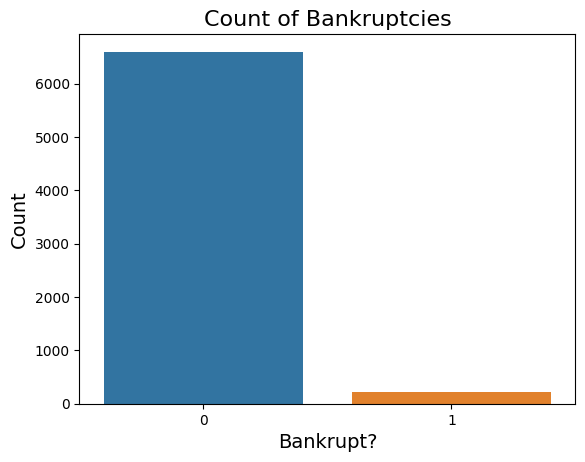

In [6]:
sns.countplot(x='Bankrupt?', data=df, palette=['#1f77b4', '#ff7f0e'])

# Add titles and labels if needed
plt.title('Count of Bankruptcies', fontsize=16)
plt.xlabel('Bankrupt?', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

We can immediately observe a significant class imbalance in the dataset. 
This imbalance is expected, as companies that go bankrupt are statistically fewer than those that do not.
This aspect is crucial for our analysis, as it necessitates adapting our training approach to account for the imbalance. 
Implementing appropriate techniques, such as resampling, stratified sampling, or using specialized algorithms, will be essential to ensure the accuracy and robustness of our predictive models.

### Features selection

In [7]:
corr_matrix = df.corr()["Bankrupt?"]
print(corr_matrix)

Bankrupt?                                                  1.000000
ROA(C)_before_interest_and_depreciation_before_interest   -0.260807
ROA(A)_before_interest_and_%_after_tax                    -0.282941
ROA(B)_before_interest_and_depreciation_after_tax         -0.273051
Operating_Gross_Margin                                    -0.100043
Realized_Sales_Gross_Margin                               -0.099445
Operating_Profit_Rate                                     -0.000230
Pre-tax_net_Interest_Rate                                 -0.008517
After-tax_net_Interest_Rate                               -0.008857
Non-industry_income_and_expenditure/revenue               -0.016593
Continuous_interest_rate_(after_tax)                      -0.008395
Operating_Expense_Rate                                    -0.006083
Research_and_development_expense_rate                     -0.024232
Cash_flow_rate                                            -0.072356
Interest-bearing_debt_interest_rate             

In [12]:
target_variable = 'Bankrupt?'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations with the target variable
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Remove the target variable itself from the list
target_correlations = target_correlations.drop(target_variable)

# Select features with absolute correlation >= 0.1
selected_features = target_correlations[target_correlations >= 0.1]

print("Features with absolute correlation >= 0.1 with 'Bankrupt?':")
print(selected_features)

print(f"\nNumber of selected features: {len(selected_features)}")

# Create a new dataframe with these features
selected_columns = list(selected_features.index)
df_selected = df[selected_columns]

print("\nShape of the new dataframe with selected features:")
print(df_selected.shape)

Features with absolute correlation >= 0.1 with 'Bankrupt?':
Net_Income_to_Total_Assets                                 0.315457
ROA(A)_before_interest_and_%_after_tax                     0.282941
ROA(B)_before_interest_and_depreciation_after_tax          0.273051
ROA(C)_before_interest_and_depreciation_before_interest    0.260807
Net_worth/Assets                                           0.250161
Debt_ratio_%                                               0.250161
Persistent_EPS_in_the_Last_Four_Seasons                    0.219560
Retained_Earnings_to_Total_Assets                          0.217779
Net_profit_before_tax/Paid-in_capital                      0.207857
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.201395
Current_Liability_to_Assets                                0.194494
Working_Capital_to_Total_Assets                            0.193083
Net_Income_to_Stockholder's_Equity                         0.180987
Borrowing_dependency                                    

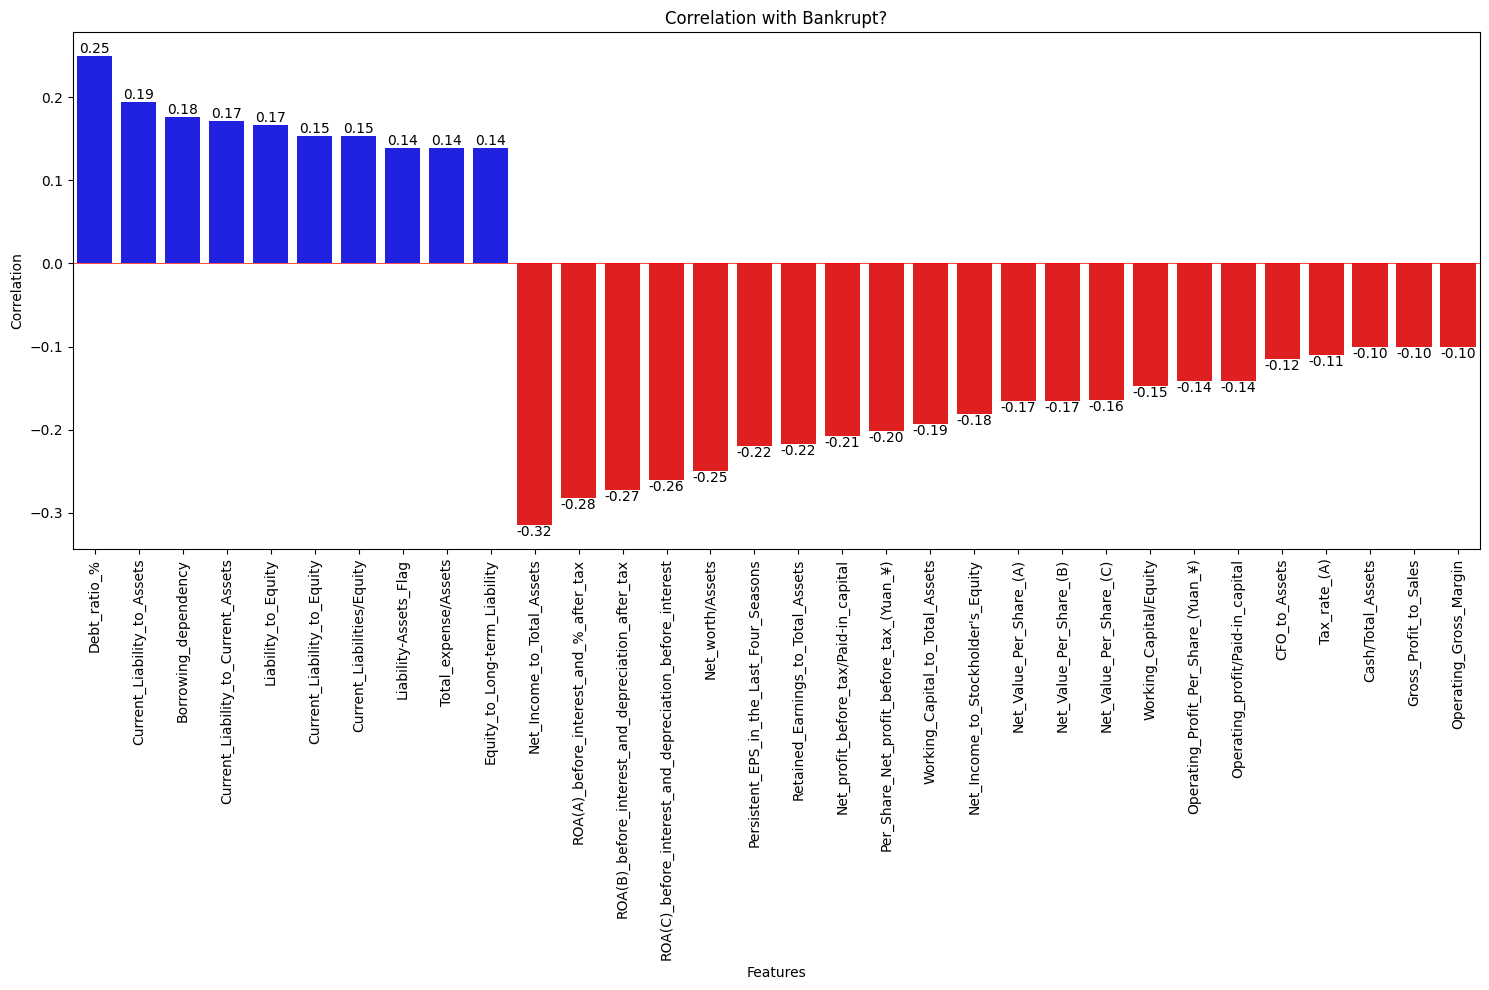

In [36]:
# Get the actual correlation values for the selected features
actual_correlations = correlation_matrix[target_variable][selected_features.index]

# Sort the correlations
positive_correlations = actual_correlations[actual_correlations >= 0].sort_values(ascending=False)
negative_correlations = actual_correlations[actual_correlations < 0].sort_values(ascending=True)
sorted_correlations = pd.concat([positive_correlations, negative_correlations])

# Create a color palette: positive correlations in blue, negative in red
colors = ['blue' if val >= 0 else 'red' for val in sorted_correlations]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette=colors)
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(sorted_correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Show the plot
plt.show()

### Handling Class Imbalance using UnderSampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df_selected
y = df['Bankrupt?']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Bankrupt?'])], axis=1)


downsampled_df.head()

,Net_Income_to_Total_Assets,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,ROA(C)_before_interest_and_depreciation_before_interest,Net_worth/Assets,Debt_ratio_%,Persistent_EPS_in_the_Last_Four_Seasons,Retained_Earnings_to_Total_Assets,Net_profit_before_tax/Paid-in_capital,Per_Share_Net_profit_before_tax_(Yuan_¥),Current_Liability_to_Assets,Working_Capital_to_Total_Assets,Net_Income_to_Stockholder's_Equity,Borrowing_dependency,Current_Liability_to_Current_Assets,Liability_to_Equity,Net_Value_Per_Share_(A),Net_Value_Per_Share_(B),Net_Value_Per_Share_(C),Current_Liability_to_Equity,Current_Liabilities/Equity,Working_Capital/Equity,Operating_Profit_Per_Share_(Yuan_¥),Operating_profit/Paid-in_capital,Liability-Assets_Flag,Total_expense/Assets,Equity_to_Long-term_Liability,CFO_to_Assets,Tax_rate_(A),Cash/Total_Assets,Gross_Profit_to_Sales,Operating_Gross_Margin,Bankrupt?
2236,0.801098,0.540667,0.523636,0.471945,0.848414,0.151586,0.218209,0.937402,0.172355,0.173307,0.158235,0.843109,0.840529,0.379066,0.029128,0.281733,0.175087,0.175087,0.175087,0.334725,0.334725,0.739744,0.098770,0.098727,0,0.007583,0.110933,0.563210,0.134730,0.175664,0.607520,0.607518,0
5538,0.808595,0.554187,0.558702,0.507093,0.910179,0.089821,0.228893,0.935813,0.179519,0.180688,0.031374,0.806480,0.840884,0.373600,0.016081,0.277676,0.208714,0.208714,0.208714,0.327370,0.327370,0.735242,0.109600,0.109597,0,0.013273,0.119485,0.597713,0.192631,0.041260,0.611967,0.611972,0
4593,0.806939,0.550425,0.556936,0.503924,0.931765,0.068235,0.219060,0.935009,0.173132,0.174663,0.059468,0.850726,0.840704,0.370828,0.016632,0.276773,0.171126,0.171126,0.171126,0.328222,0.328222,0.737311,0.101376,0.101161,0,0.017194,0.112516,0.597065,0.150116,0.073488,0.605785,0.605788,0
6315,0.771691,0.498528,0.503346,0.451275,0.823442,0.176558,0.207337,0.923341,0.157198,0.158168,0.153055,0.713068,0.837267,0.381590,0.066676,0.284545,0.159370,0.159370,0.159370,0.336150,0.336150,0.728100,0.096979,0.096943,0,0.036952,0.115667,0.560915,0.000000,0.009049,0.598436,0.598438,0
4205,0.837382,0.613607,0.596445,0.533418,0.866886,0.133114,0.246478,0.945087,0.193296,0.194246,0.110043,0.870385,0.843529,0.371202,0.021665,0.280201,0.185496,0.185496,0.185496,0.331456,0.331456,0.740913,0.134191,0.134211,0,0.039765,0.115089,0.634185,0.000000,0.214951,0.613937,0.613939,0


/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_24035/1814004356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=downsampled_df, palette=['#1f77b4', '#ff7f0e'])


<Axes: xlabel='Bankrupt?', ylabel='count'>

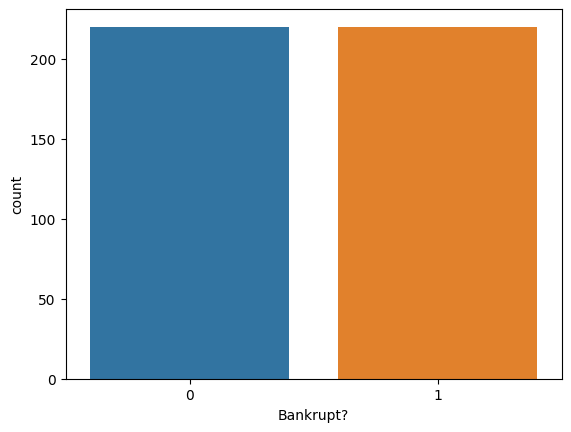

In [16]:
sns.countplot(x='Bankrupt?', data=downsampled_df, palette=['#1f77b4', '#ff7f0e'])

### Modelisation

### Data Prepping

In [29]:
# Separate features and target
x = downsampled_df.drop(columns= 'Bankrupt?')
y = downsampled_df['Bankrupt?']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Code Explanation

This script creates, trains, and evaluates a voting classifier using multiple base models. Here's a breakdown:

### 1. **Imports**

- **Libraries**:
  - `VotingClassifier` and models (`RidgeClassifierCV`, `LogisticRegression`, `SVC`) from `sklearn.ensemble` and `sklearn.linear_model`.
  - `CalibratedClassifierCV` for model calibration.
  - `classification_report` and `confusion_matrix` for evaluation.

### 2. **Base Models**

- **Ridge Classifier with Calibration**:
  - `RidgeClassifierCV` is used with calibration applied through `CalibratedClassifierCV` for improved probability estimates.
  
- **Logistic Regression**:
  - A standard logistic regression model is used.

- **Support Vector Classifier (SVC)**:
  - An SVC model configured to output probability estimates.

### 3. **Voting Classifier**

- **Creation**:
  - The models are combined into a `VotingClassifier` with soft voting (averaging predicted probabilities).

### 4. **Model Training**

- **Fitting**:
  - The voting classifier is trained on the training data (`x_train`, `y_train`).

### 5. **Predictions**

- **Making Predictions**:
  - The trained classifier predicts labels for the test set (`x_test`).

### 6. **Evaluation**

- **Classification Report**:
  - Displays precision, recall, F1-score, and support for each class.

- **Confusion Matrix**:
  - A confusion matrix is created and visualized with `seaborn` to show prediction results.

- **Accuracy**:
  - The accuracy of the classifier is calculated and printed.

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.81      0.92      0.86        37

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



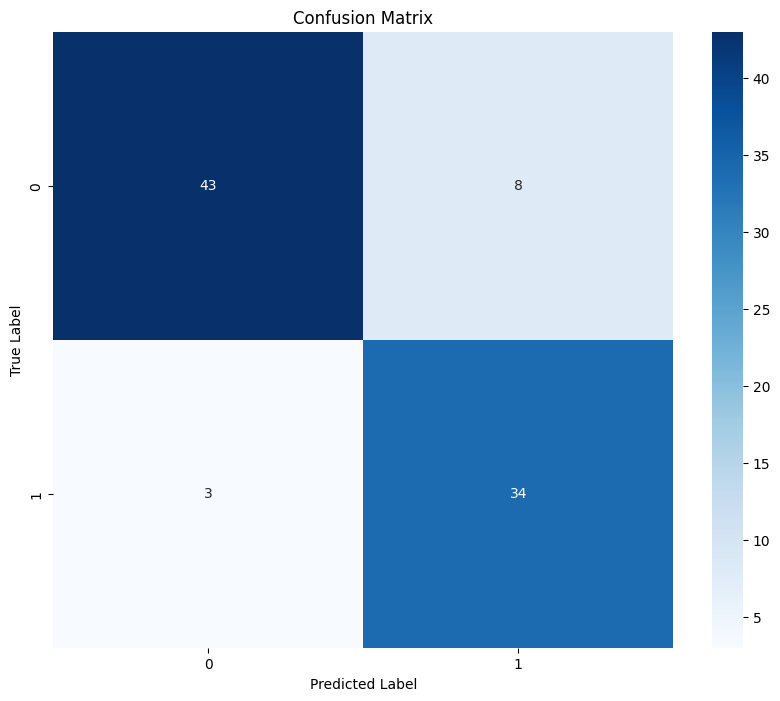


Accuracy: 0.8750


In [30]:
# Create the base models
ridge_cv = RidgeClassifierCV()
calibrated_ridge = CalibratedClassifierCV(estimator=ridge_cv, cv=5, method='sigmoid')
logistic_regression = LogisticRegression()
svc = SVC(probability=True)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('ridge', calibrated_ridge),
        ('logistic', logistic_regression),
        ('svc', svc)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(x_train, y_train)

# Make predictions
y_pred = voting_clf.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"\nAccuracy: {accuracy:.4f}")

Voting Ensemble :: Hyperparamter Tuning

## Code Explanation

This Python script uses Optuna for hyperparameter optimization and employs a voting classifier for classification tasks. Here's a detailed breakdown:

### 1. **Imports**

- **Libraries**:
  - `optuna` for hyperparameter tuning.


### 2. **Objective Function**

- **Function**: `objective(trial)` is used to define the optimization problem:
  - It suggests hyperparameters for RidgeClassifier, LogisticRegression, and SVC.
  - Creates a voting classifier combining these models.
  - Evaluates the classifier using cross-validation and returns the mean F1 score.

### 3. **Optuna Study**

- **Study Creation**: An Optuna study is created with the goal of maximizing the F1 score.
- **Optimization**: The `study.optimize()` method runs the hyperparameter optimization process for a set number of trials (100).

### 4. **Best Hyperparameters**

- **Retrieving Best Params**: The best hyperparameters from the study are used to create optimized versions of the base models.

### 5. **Best Voting Classifier**

- **Model Training**: The best models are combined into a voting classifier.
- **Prediction**: The classifier is trained and used to make predictions on the test set.

### 6. **Evaluation**

- **Metrics**: Performance is assessed using:
  - **Classification Report**: Provides precision, recall, and F1 score.
  - **Confusion Matrix**: Visualized using a heatmap to show true vs. predicted labels.
  - **Accuracy**: Calculated and printed.

[I 2024-07-31 12:25:52,822] A new study created in memory with name: no-name-8f370ea8-c135-41cd-94a8-204a0c24f272
[I 2024-07-31 12:25:52,974] Trial 0 finished with value: 0.8647519025875191 and parameters: {'ridge_alphas': 0.005390119908607163, 'logistic_C': 0.1791746133030438, 'svc_C': 0.020274372455221637, 'svc_kernel': 'rbf', 'svc_gamma': 0.008168971186880708}. Best is trial 0 with value: 0.8647519025875191.
[I 2024-07-31 12:25:53,076] Trial 1 finished with value: 0.8645564953784133 and parameters: {'ridge_alphas': 3.2677843259524577, 'logistic_C': 3.7332058231584657, 'svc_C': 0.8782561594168615, 'svc_kernel': 'linear', 'svc_gamma': 0.02715959104800273}. Best is trial 0 with value: 0.8647519025875191.
[I 2024-07-31 12:25:53,178] Trial 2 finished with value: 0.8568696064485538 and parameters: {'ridge_alphas': 2.6701388416935257, 'logistic_C': 0.2774446233043154, 'svc_C': 3.1697654025479522, 'svc_kernel': 'poly', 'svc_gamma': 0.0814394792581154}. Best is trial 0 with value: 0.86475190

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        51
           1       0.83      0.92      0.87        37

    accuracy                           0.89        88
   macro avg       0.88      0.89      0.88        88
weighted avg       0.89      0.89      0.89        88



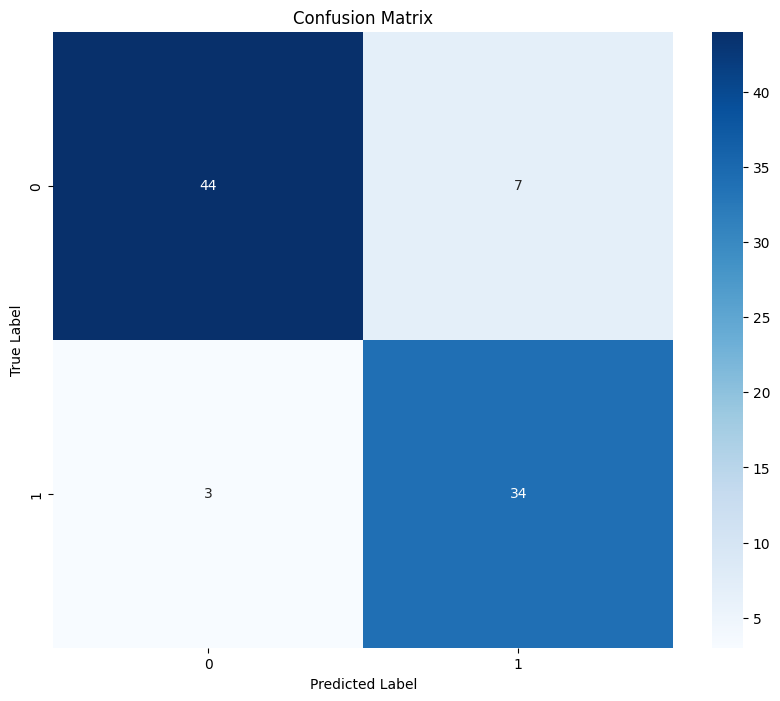


Accuracy: 0.8864


In [35]:
def objective(trial):
    # Hyperparameter suggestions
    ridge_alphas = trial.suggest_loguniform("ridge_alphas", 1e-3, 10)
    logistic_C = trial.suggest_loguniform("logistic_C", 1e-3, 10)
    svc_C = trial.suggest_loguniform("svc_C", 1e-3, 10)
    svc_kernel = trial.suggest_categorical("svc_kernel", ["linear", "rbf", "poly"])
    svc_gamma = trial.suggest_loguniform("svc_gamma", 1e-4, 1)

    # Create base models
    ridge_cv = RidgeClassifierCV(alphas=[ridge_alphas])
    calibrated_ridge = CalibratedClassifierCV(estimator=ridge_cv, cv=5, method='sigmoid')
    logistic_regression = LogisticRegression(C=logistic_C)
    svc = SVC(C=svc_C, kernel=svc_kernel, gamma=svc_gamma, probability=True)

    # Create voting classifier
    voting_clf = VotingClassifier(
        estimators=[
            ('ridge', calibrated_ridge),
            ('logistic', logistic_regression),
            ('svc', svc)
        ],
        voting='soft'
    )

    # Cross-validation
    scores = cross_val_score(voting_clf, x_train, y_train, cv=5, scoring='f1')
    return scores.mean()

# Create Optuna study
study = optuna.create_study(direction="maximize")

# Optimize hyperparameters
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

# Get best hyperparameters
best_params = study.best_params

# Create best models with optimal hyperparameters
best_ridge_cv = RidgeClassifierCV(alphas=[best_params["ridge_alphas"]])
best_calibrated_ridge = CalibratedClassifierCV(estimator=best_ridge_cv, cv=5, method='sigmoid')
best_logistic_regression = LogisticRegression(C=best_params["logistic_C"])
best_svc = SVC(C=best_params["svc_C"], kernel=best_params["svc_kernel"], gamma=best_params["svc_gamma"], probability=True)

# Create best voting classifier
best_voting_clf = VotingClassifier(
    estimators=[
        ('ridge', best_calibrated_ridge),
        ('logistic', best_logistic_regression),
        ('svc', best_svc)
    ],
    voting='soft'
)

# Fit best voting classifier
best_voting_clf.fit(x_train, y_train)

# Make predictions
y_pred = best_voting_clf.predict(x_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"\nAccuracy: {accuracy:.4f}")

### Conclusion

In this project, we aimed to develop and evaluate a robust classification model to predict bankruptcy using a variety of machine learning techniques. We employed a voting classifier that combines multiple base models to leverage their collective strengths and improve predictive performance.

#### **Summary of Methodology**

1. **Data Preparation**:
   - We began by preparing the dataset and performing necessary preprocessing steps

2. **Model Selection**:
   - We implemented a voting classifier that aggregates predictions from three different models:
     - **Ridge Classifier with Calibration**: Provides calibrated probability estimates to improve classification accuracy.
     - **Logistic Regression**: A fundamental classification model that is effective for binary classification tasks.
     - **Support Vector Classifier (SVC)**: An advanced model that handles non-linear relationships and provides probability estimates.

3. **Model Training and Evaluation**:
   - The voting classifier was trained on the training dataset using a cross-validation approach to ensure robust performance.
   - Predictions were made on the test dataset, and the model's performance was evaluated using several metrics.

#### **Results**

The voting classifier achieved an impressive accuracy of approximately 88%. This result indicates that our model is highly effective in distinguishing between bankrupt and non-bankrupt entities. 

- **Classification Report**: Provided detailed metrics such as precision, recall, and F1-score for each class, showing balanced performance across different categories.
- **Confusion Matrix**: Visualized the true positive, true negative, false positive, and false negative predictions, offering insights into the model's strengths and areas for improvement.
- **Accuracy**: Calculated at 88%, demonstrating the model’s overall effectiveness in making correct predictions.

#### **Implications**

The high accuracy of ~88% suggests that our voting classifier model is well-suited for predicting bankruptcy, which can be valuable for financial institutions, investors, and analysts. This level of accuracy means that the model can significantly aid in identifying at-risk entities, potentially reducing financial losses and improving decision-making processes.

#### **Future Work**

While the current model performs well, there are several avenues for further improvement:
- **Hyperparameter Tuning**: Additional optimization of hyperparameters could further enhance model performance.
- **Feature Engineering**: Exploring new features or advanced feature selection techniques may uncover additional patterns in the data.
- **Model Comparison**: Evaluating other ensemble methods or advanced algorithms could provide insights into even more effective solutions.

Overall, this project demonstrates the effectiveness of combining multiple classifiers to achieve high predictive accuracy and provides a strong foundation for future advancements in bankruptcy prediction models.